In [25]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv'
df = pd.read_csv('https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv')

df.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07


In [8]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [16]:
df['ppm_fixed'] = df['ppm'].map(lambda x: np.nan if x < 0 else x)
df['ppm_fixed'].fillna(method='backfill', inplace=True)

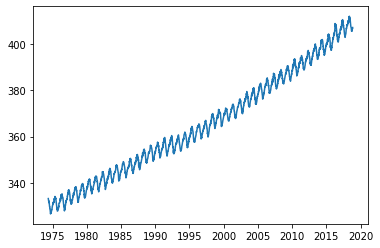

In [17]:
plt.plot( df.date, df.ppm_fixed)

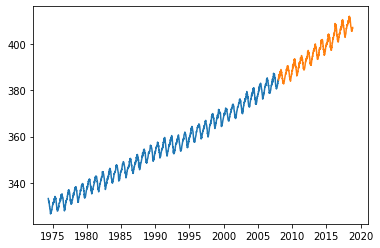

In [50]:
cut_year = 2008

train = df[df.year < cut_year]
test = df[df.year>=cut_year]

plt.plot( train.date, train.ppm_fixed)
plt.plot( test.date, test.ppm_fixed)

#plt.legend()

In [51]:
fb_df = train[['date', 'ppm_fixed']].copy()
fb_df.columns = ['ds', 'y']

fb_df.head()

,ds,y
0,1974-05-19,333.34
1,1974-05-26,332.95
2,1974-06-02,332.32
3,1974-06-09,332.18
4,1974-06-16,332.37


In [52]:
m = Prophet()
m.fit(fb_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
len(test)

566

In [54]:
future = m.make_future_dataframe(periods=len(test), freq='W', include_history=False)
future.tail()

,ds
561,2018-10-07
562,2018-10-14
563,2018-10-21
564,2018-10-28
565,2018-11-04


In [55]:
test.tail()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800,date,ppm_fixed
2316,2018,10,7,2018.7658,405.58,7,403.38,382.78,129.25,2018-10-07,405.58
2317,2018,10,14,2018.7849,406.00,6,403.81,382.92,129.45,2018-10-14,406.00
2318,2018,10,21,2018.8041,406.62,7,404.04,383.04,129.77,2018-10-21,406.62
2319,2018,10,28,2018.8233,406.48,6,404.07,383.96,129.29,2018-10-28,406.48
2320,2018,11,4,2018.8425,406.99,5,404.26,383.80,129.43,2018-11-04,406.99


In [56]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-06,385.044879,384.424480,385.427425,385.044879,385.044879,-0.118980,-0.118980,-0.118980,-0.118980,-0.118980,-0.118980,0.0,0.0,0.0,384.925899
1,2008-01-13,385.085336,384.602801,385.644463,385.085336,385.085336,0.055268,0.055268,0.055268,0.055268,0.055268,0.055268,0.0,0.0,0.0,385.140604
2,2008-01-20,385.125792,384.828544,385.848223,385.125792,385.125792,0.224634,0.224634,0.224634,0.224634,0.224634,0.224634,0.0,0.0,0.0,385.350426
3,2008-01-27,385.166249,385.006941,386.049764,385.166249,385.166249,0.384813,0.384813,0.384813,0.384813,0.384813,0.384813,0.0,0.0,0.0,385.551062
4,2008-02-03,385.206705,385.241650,386.243024,385.206705,385.206705,0.532063,0.532063,0.532063,0.532063,0.532063,0.532063,0.0,0.0,0.0,385.738768


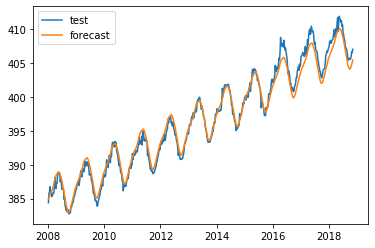

In [57]:
#plt.plot( train.date, train.ppm_fixed, label='train')
plt.plot( test.date, test.ppm_fixed, label='test')

plt.plot( forecast.ds, forecast.yhat, label='forecast')

plt.legend()

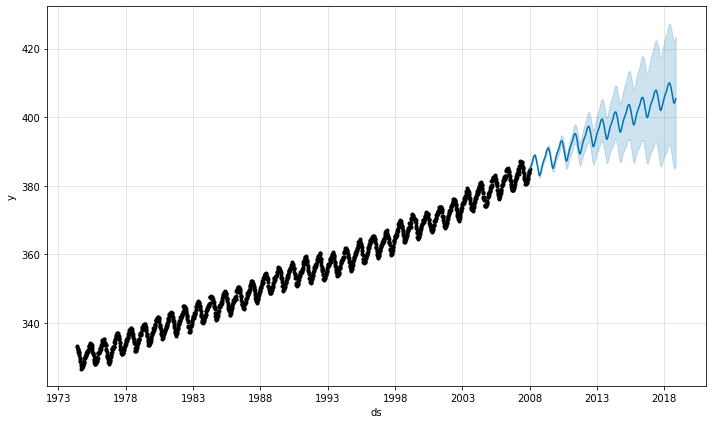

In [59]:
m.plot(forecast);